In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

# Goal
The August 2022 edition of the Tabular Playground Series is an opportunity to help the fictional company Keep It Dry improve its main product Super Soaker. The product is used in factories to absorb spills and leaks.

The company has just completed a large testing study for different product prototypes. Can you use this data to build a model that predicts product failures?

In [2]:
train = pd.read_csv('../input/tabular-playground-series-aug-2022/train.csv')
test = pd.read_csv('../input/tabular-playground-series-aug-2022/test.csv')
sub = pd.read_csv('../input/tabular-playground-series-aug-2022/sample_submission.csv')

print(train.shape)
print(test.shape)
print(sub.shape)

(26570, 26)
(20775, 25)
(20775, 2)


In [3]:
train

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26565,26565,E,158.95,material_7,material_6,6,9,6,16,4,16.301,13.259,18.068,15.505,10.865,19.354,NaN,12.177,17.942,10.112,15.795,18.572,16.144,NaN,729.131,0
26566,26566,E,146.02,material_7,material_6,6,9,10,12,8,17.543,NaN,17.984,19.078,11.139,19.563,11.242,14.179,20.564,10.234,14.450,14.322,13.146,16.471,853.924,0
26567,26567,E,115.62,material_7,material_6,6,9,1,10,1,15.670,11.535,16.778,18.385,11.630,19.279,11.407,16.437,17.476,8.668,15.069,16.599,15.590,14.065,750.364,0
26568,26568,E,106.38,material_7,material_6,6,9,2,9,4,18.059,NaN,16.918,18.101,11.713,19.358,11.392,17.064,17.814,14.928,16.273,15.485,13.624,12.865,730.156,0


# EDA

In [4]:
train.duplicated().sum()

0

In [5]:
def eda(df):
    summary = pd.DataFrame(df.dtypes, columns = ['dtype'])
    summary['missing'] = df.isnull().sum()
    summary['miss_pct'] = summary['missing']/len(df)
    summary['nlevel'] = df.nunique()
    return summary

eda(train)

,dtype,missing,miss_pct,nlevel
id,int64,0,0.000000,26570
product_code,object,0,0.000000,5
loading,float64,250,0.009409,11950
attribute_0,object,0,0.000000,2
attribute_1,object,0,0.000000,3
attribute_2,int64,0,0.000000,4
attribute_3,int64,0,0.000000,4
measurement_0,int64,0,0.000000,29
measurement_1,int64,0,0.000000,30
measurement_2,int64,0,0.000000,25


In [6]:
eda(test)

,dtype,missing,miss_pct,nlevel
id,int64,0,0.000000,20775
product_code,object,0,0.000000,4
loading,float64,223,0.010734,10741
attribute_0,object,0,0.000000,2
attribute_1,object,0,0.000000,3
attribute_2,int64,0,0.000000,3
attribute_3,int64,0,0.000000,4
measurement_0,int64,0,0.000000,30
measurement_1,int64,0,0.000000,33
measurement_2,int64,0,0.000000,28


In [7]:
train.failure.value_counts()

0    20921
1     5649
Name: failure, dtype: int64

In [8]:
train[['product_code','attribute_0','attribute_1','attribute_2','attribute_3','failure']].value_counts()

product_code  attribute_0  attribute_1  attribute_2  attribute_3  failure
C             material_7   material_8   5            8            0          4545
E             material_7   material_6   6            9            0          4237
B             material_5   material_5   8            8            0          4198
D             material_7   material_5   6            6            0          4000
A             material_7   material_8   9            5            0          3941
C             material_7   material_8   5            8            1          1220
A             material_7   material_8   9            5            1          1159
D             material_7   material_5   6            6            1          1112
E             material_7   material_6   6            9            1          1106
B             material_5   material_5   8            8            1          1052
dtype: int64

In [9]:
test[['product_code','attribute_0','attribute_1','attribute_2','attribute_3']].value_counts()

product_code  attribute_0  attribute_1  attribute_2  attribute_3
F             material_5   material_6   6            4              5422
I             material_7   material_5   9            5              5228
G             material_5   material_6   9            7              5107
H             material_7   material_7   7            9              5018
dtype: int64

<AxesSubplot:>

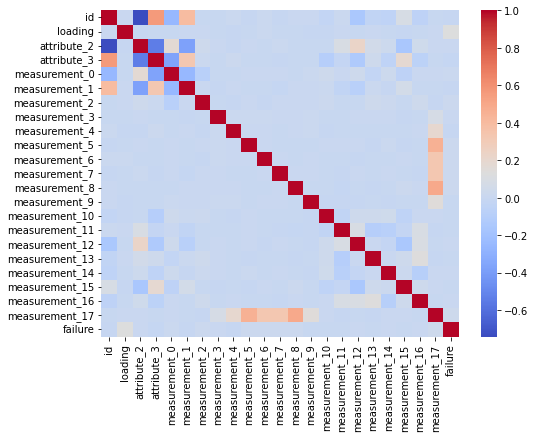

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), cmap = 'coolwarm')

In [11]:
train.corr()['failure'].abs().reset_index().sort_values(by = 'failure',ascending = False)

,index,failure
22,failure,1.000000
1,loading,0.129089
21,measurement_17,0.033905
3,attribute_3,0.019222
9,measurement_5,0.018079
12,measurement_8,0.017119
11,measurement_7,0.016787
6,measurement_2,0.015808
10,measurement_6,0.014791
5,measurement_1,0.010810


In [12]:
df = pd.concat([train, test])
print(df.shape)
df.head(3)

(47345, 26)


,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0.0
1,1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0.0
2,2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0.0


# FE

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for c in ['product_code','attribute_0','attribute_1']:
    df[c] = le.fit_transform(df[c])
    
df.head(2)    

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
0,0,0,80.10,1,3,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0.0
1,1,0,84.89,1,3,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0.0


In [14]:
######################### Freq encoding

for col in ['attribute_0','attribute_1','attribute_2','attribute_3']:    
    fq_encode = df[col].value_counts(dropna= True, normalize = True).to_dict()   
    df[col+'_fq_enc'] = df[col].map(fq_encode)

    
############################ Agg features   
main_cols = ['loading','measurement_11']
ag_cols = ['attribute_0','attribute_1','attribute_2','attribute_3']

for col_a in main_cols: 
    for col_b in ag_cols:
        df[col_a + '_' + col_b + '_mean'] = df.groupby(col_b)[col_a].transform('mean')    
        df[col_a + '_' + col_b + '_std'] = df.groupby(col_b)[col_a].transform('std')
        #df[col_a + '_' + col_b + '_median'] = df.groupby(col_b)[col_a].transform('median')

df['loading+measurement9'] = df['loading'] + df['measurement_9']        
df['loading+measurement11'] = df['loading'] + df['measurement_11'] 
df['measurement_11+9'] = df['measurement_11'] + df['measurement_9'] 

df.head() 

,id,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,measurement_7,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure,attribute_0_fq_enc,attribute_1_fq_enc,attribute_2_fq_enc,attribute_3_fq_enc,loading_attribute_0_mean,loading_attribute_0_std,loading_attribute_1_mean,loading_attribute_1_std,loading_attribute_2_mean,loading_attribute_2_std,loading_attribute_3_mean,loading_attribute_3_std,measurement_11_attribute_0_mean,measurement_11_attribute_0_std,measurement_11_attribute_1_mean,measurement_11_attribute_1_std,measurement_11_attribute_2_mean,measurement_11_attribute_2_std,measurement_11_attribute_3_mean,measurement_11_attribute_3_std,loading+measurement9,loading+measurement11,measurement_11+9
0,0,0,80.10,1,3,9,5,7,8,4,18.040,12.518,15.748,19.292,11.739,20.155,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0.0,0.666723,0.229486,0.326011,0.218143,127.856901,39.257627,127.818301,39.369755,127.970287,39.288624,127.836972,39.155805,19.16119,1.50365,19.091088,1.60499,19.222873,1.674223,19.272901,1.62291,90.772,97.694,28.266
1,1,0,84.89,1,3,9,5,14,3,3,18.213,11.540,17.717,17.893,12.748,17.889,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0.0,0.666723,0.229486,0.326011,0.218143,127.856901,39.257627,127.818301,39.369755,127.970287,39.288624,127.836972,39.155805,19.16119,1.50365,19.091088,1.60499,19.222873,1.674223,19.272901,1.62291,97.338,102.805,30.363
2,2,0,82.43,1,3,9,5,12,1,5,18.057,11.652,16.738,18.240,12.718,18.288,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0.0,0.666723,0.229486,0.326011,0.218143,127.856901,39.257627,127.818301,39.369755,127.970287,39.288624,127.836972,39.155805,19.16119,1.50365,19.091088,1.60499,19.222873,1.674223,19.272901,1.62291,95.145,NaN,NaN
3,3,0,101.07,1,3,9,5,13,2,6,17.295,11.188,18.576,18.339,12.583,19.060,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0.0,0.666723,0.229486,0.326011,0.218143,127.856901,39.257627,127.818301,39.369755,127.970287,39.288624,127.836972,39.155805,19.16119,1.50365,19.091088,1.60499,19.222873,1.674223,19.272901,1.62291,113.541,119.447,30.848
4,4,0,188.06,1,3,9,5,9,2,8,19.346,12.950,16.990,15.746,11.306,18.093,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0.0,0.666723,0.229486,0.326011,0.218143,127.856901,39.257627,127.818301,39.369755,127.970287,39.288624,127.836972,39.155805,19.16119,1.50365,19.091088,1.60499,19.222873,1.674223,19.272901,1.62291,198.397,207.992,30.269


In [15]:
for c in df.columns:
    df[c] = df[c].fillna(df[c].mean())
    

In [16]:
train = df[:len(train)]
test = df[-len(test):]

X_train = train.drop(['id','failure'], axis = 1)
X_test = test.drop(['id','failure'], axis = 1)

print(X_train.shape)
print(X_test.shape)

y_train = train.failure

print(y_train.shape)

(26570, 47)
(20775, 47)
(26570,)


# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2022)
gkf = GroupKFold(n_splits = 5)
preds = np.zeros(len(sub))
oof = np.zeros(len(X_train))

for i, (idxt, idxv) in enumerate(skf.split(X_train, y_train)):
#for i, (idxt, idxv) in enumerate(gkf.split(X_train, groups = grp)):
    
    print('Fold', i+1)
    print('*' * 50)
    
    X_trn, X_val = X_train.iloc[idxt], X_train.iloc[idxv]
    y_trn, y_val = y_train.iloc[idxt], y_train.iloc[idxv]

    clf = LogisticRegression(max_iter = 500, C=0.0001, penalty='l2', solver='newton-cg')
    
    clf.fit(X_trn, y_trn)

    oof[idxv] = clf.predict_proba(X_val)[:,1]
    preds += clf.predict_proba(X_test)[:,1]/skf.n_splits
    
print('OOF ROC', roc_auc_score(y_train, oof))     

Fold 1
**************************************************
Fold 2
**************************************************
Fold 3
**************************************************
Fold 4
**************************************************
Fold 5
**************************************************
OOF ROC 0.5902251673338834


In [18]:
sub.failure = preds
sub

,id,failure
0,26570,0.200373
1,26571,0.163631
2,26572,0.185632
3,26573,0.189660
4,26574,0.343759
...,...,...
20770,47340,0.231602
20771,47341,0.152260
20772,47342,0.148567
20773,47343,0.217156


In [19]:
sub.to_csv('logistic_submission.csv', index = False)